<center>
    <h1>Pattern Analysis | SS20</h1>
    <hr>
    <br>
    <div style="margin:0 60px 0px 0">
        <img src="https://www5.cs.fau.de/images/lme.jpg" alt="PA" width=200px align=center>
    </div>
    <h3>Exercises for </h3>
    <h2>Pattern Analysis Programming</h2>
    <br>
</center>

# Warmup: Sampling from a Closed-Form Distribution

`Task 1: April 21 – April 29`

- [Exercise 1](#1)
    - [Exercise 1.1 Gaussian Distribution](#1.1)
    - [Exercise 1.2 PDF](#1.2)
- [Exercise 2](#2)
- [Exercise 3](#3)

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 

np.random.seed(42)

<a name='1'></a>

## Exercise 1

- Implement a function that draws `1000` samples from an univariant gaussian distribution with mean `1` and a standard deviation of `0.2`. 
- Plot the experimental distribution using `30` bins. 
- In order to compare it with the ground truth distribution, generate also the plot of such.

<br>

Probability Density Function for Gaussians (PDF)

## $\displaystyle f(t) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(t-\mu)^2}{2\sigma^2}}$

<a name='1.1'></a>

### Exercise 1.1
### `Gaussian Distribution`

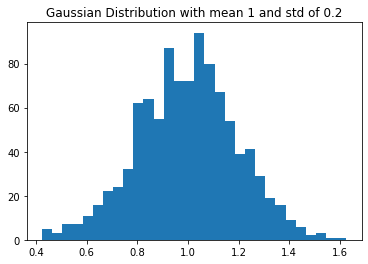

In [73]:
mu = 1
sigma = 0.2
sample_size = 1000

bins = 30

samples = np.random.normal(mu, sigma, sample_size)

_, bins,_ = plt.hist(samples, bins=bins)
plt.title("Gaussian Distribution with mean 1 and std of 0.2")
plt.show()

<a name='1.2'></a>

### Exercise 1.2
### `PDF`

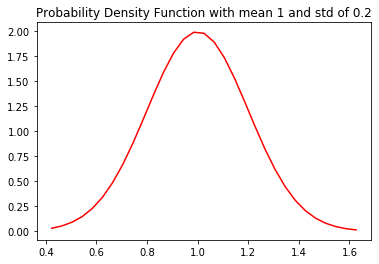

In [74]:
pdf = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) )

plt.plot(bins, pdf, color="r")
plt.title("Probability Density Function with mean 1 and std of 0.2")
plt.show()

<a name='2'></a>

## Exercise 2

The probability density function for multivariate normal distribution is:

$\displaystyle f(x) = \frac{1}{\sqrt{(2 \pi)^k \det \Sigma}} \exp\left( -\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right)$

<br>

- Implement a function that draws 10000 samples from a multivariant gaussian dis- tribution (2D in this case) with mean mean vector `[0.5, −0.2]` and covariance matrix `[[2.0, 0.3], [0.3, 0.5]]`. 
- Plot the experimental distribution using `30` bins `(30x30)`. 
- In order to compare it with the ground truth distribution, generate also the plot of such.

In [76]:
mu = [0.5, -0.2]
cov = [[2.0, 0.3], [0.3, 0.5]]
bins = 30
n = 10000

mv_samples = np.random.multivariate_normal(mu, cov, n)

In [95]:
# Positive Definite
np.linalg.eigvals(cov)

array([2.05777472, 0.44222528])

In [101]:
rv = multivariate_normal(mu, cov)

In [102]:
x = np.linspace(-6,6,n)
y = np.linspace(-6,6,n)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

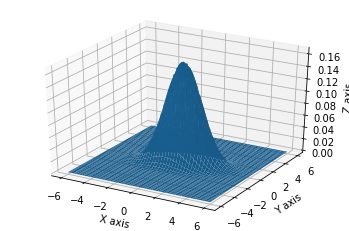

In [103]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()